<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Decision_Tree_using_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entropt is decision tree, complete code and implementation


Decision Tree:
{'sex=0': {'pclass=0': 1, 'pclass=2': 1, 'pclass=1': 1}, 'sex=1': {'pclass=0': 0, 'pclass=1': 1, 'pclass=2': 0}}


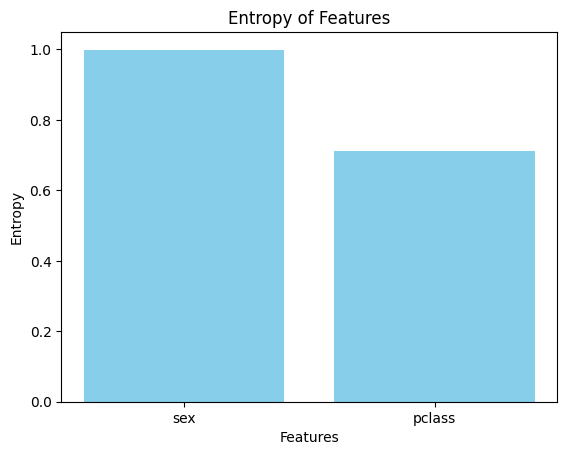

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset (e.g., Breast Cancer dataset)
data = sns.load_dataset('titanic').dropna()  # Using Titanic dataset for categorical entropy demonstration

# Select features and target
data = data[['sex', 'pclass', 'survived']]  # Simplified example

# Convert categorical data to numerical
for col in ['sex', 'pclass']:
    data[col] = data[col].astype('category').cat.codes

X = data[['sex', 'pclass']]
y = data['survived']

# Function to calculate entropy
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Function to calculate information gain
def information_gain(X_column, y):
    parent_entropy = entropy(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(y[X_column == v]) for i, v in enumerate(values))
    return parent_entropy - weighted_entropy

# Select best split
def best_split(X, y):
    best_gain = -1
    best_feature = None
    for col in X.columns:
        gain = information_gain(X[col], y)
        if gain > best_gain:
            best_gain, best_feature = gain, col
    return best_feature, best_gain

# Build a simple decision tree manually
def build_tree(X, y, depth=0, max_depth=3):
    if depth >= max_depth or len(set(y)) == 1:
        return Counter(y).most_common(1)[0][0]

    feature, gain = best_split(X, y)
    if gain == 0:
        return Counter(y).most_common(1)[0][0]

    tree = {}
    values = X[feature].unique()
    for v in values:
        X_subset = X[X[feature] == v]
        y_subset = y[X[feature] == v]
        tree[f'{feature}={v}'] = build_tree(X_subset, y_subset, depth + 1, max_depth)

    return tree

# Train and print the decision tree
tree = build_tree(X, y)
print("Decision Tree:")
print(tree)

# Plot entropy values
features = X.columns
entropies = [entropy(X[col]) for col in features]
plt.bar(features, entropies, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Entropy of Features')
plt.show()


Decision Tree:
{'sex=1': {'pclass=0': 0, 'pclass=1': 1, 'pclass=2': 0}, 'sex=0': {'pclass=1': 1, 'pclass=0': 1, 'pclass=2': 1}}
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        13
           1       0.86      0.50      0.63        24

    accuracy                           0.62        37
   macro avg       0.67      0.67      0.62        37
weighted avg       0.72      0.62      0.62        37

Accuracy: 0.6216216216216216


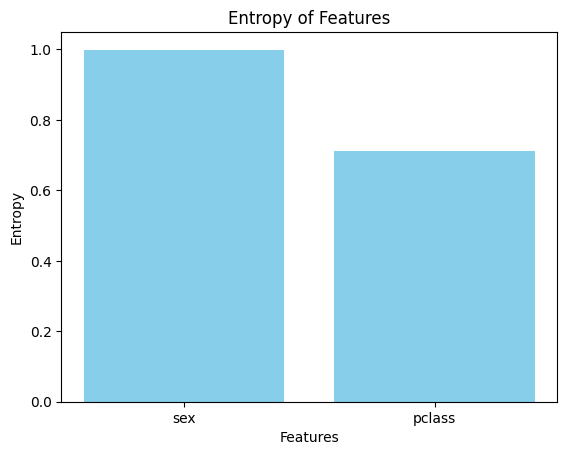

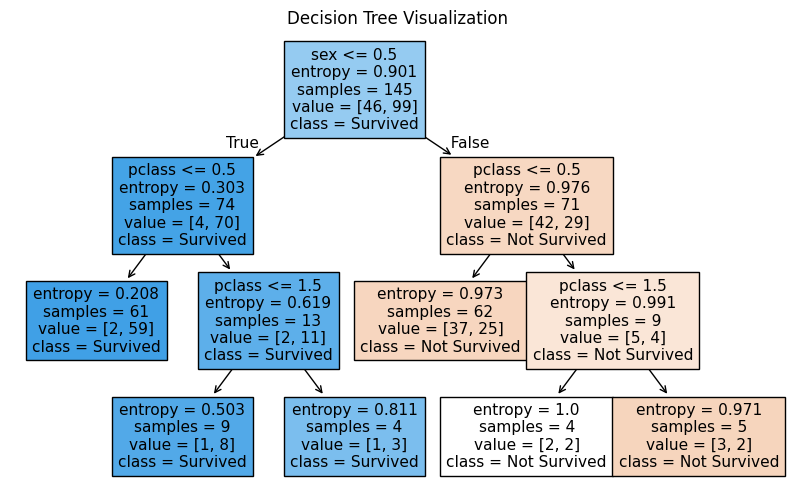

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset (e.g., Breast Cancer dataset)
data = sns.load_dataset('titanic').dropna()  # Using Titanic dataset for categorical entropy demonstration

# Select features and target
data = data[['sex', 'pclass', 'survived']]  # Simplified example

# Convert categorical data to numerical
for col in ['sex', 'pclass']:
    data[col] = data[col].astype('category').cat.codes

X = data[['sex', 'pclass']]
y = data['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate entropy
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Function to calculate information gain
def information_gain(X_column, y):
    parent_entropy = entropy(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(y[X_column == v]) for i, v in enumerate(values))
    return parent_entropy - weighted_entropy

# Select best split
def best_split(X, y):
    best_gain = -1
    best_feature = None
    for col in X.columns:
        gain = information_gain(X[col], y)
        if gain > best_gain:
            best_gain, best_feature = gain, col
    return best_feature, best_gain

# Build a simple decision tree manually
def build_tree(X, y, depth=0, max_depth=3):
    if depth >= max_depth or len(set(y)) == 1:
        return Counter(y).most_common(1)[0][0]

    feature, gain = best_split(X, y)
    if gain == 0:
        return Counter(y).most_common(1)[0][0]

    tree = {}
    values = X[feature].unique()
    for v in values:
        X_subset = X[X[feature] == v]
        y_subset = y[X[feature] == v]
        tree[f'{feature}={v}'] = build_tree(X_subset, y_subset, depth + 1, max_depth)

    return tree

# Train and print the decision tree
tree = build_tree(X_train, y_train)
print("Decision Tree:")
print(tree)

# Train a decision tree classifier using sklearn
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot entropy values
features = X.columns
entropies = [entropy(X[col]) for col in features]
plt.bar(features, entropies, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Entropy of Features')
plt.show()

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
